AEROFIT BUSINESS CASE:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Problem Statement:
        
           By analysing the given data of the Aerofit, we can identify the type of treadmill that is on demand and also the characteristics of the customers like their age distribution, fitness level, income group, usage of the product etc. By categorising these characteristics and comparing them across different types of products bought, we can assess the probability of customers belonging to a perticular category buying a specific type of product. This information helps in planning business activities like the type of treadmill on which more investment can be made which would help in improving the business in the future.

In [2]:
df=pd.read_csv('aerofit.csv')
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [3]:
df.shape

(180, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [5]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


Mean age of the customers was 28.79±6.94

Mean usage of product in a week was 3.45±1.08

Mean income of the customers was 53719.58±16506.68

Average number of miles ran by the customers in a week was 103.19±51.86

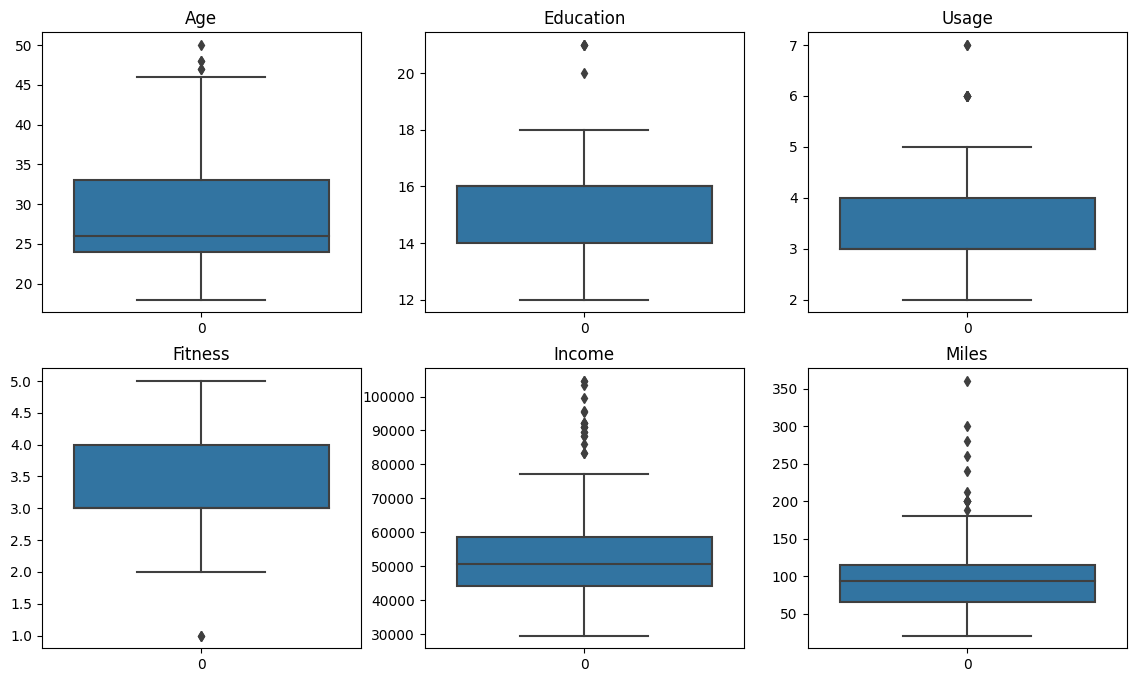

In [6]:
plt.figure(figsize=(14,8))
x=1
for i in ['Age','Education','Usage','Fitness','Income','Miles']:
    plt.subplot(2,3,x)
    plt.title(i)
    sns.boxplot(data=df[i])
    x=x+1

Age of the customers ranged from 18 to 50 years, Median age of the customers was 26 years and Half of the customers belonged to the age between 24 to 33 Years.

50% of the customers had 14 to 16 years of education.

50% of the customers had income between 44000 to 59000.

Number of miles ran by the customers ranged from a minimum of 21 to a maximum of 360 per week with a median of 94 miles. Half of the customers ran between 66 to 115 miles per week.

<Axes: xlabel='Age', ylabel='Count'>

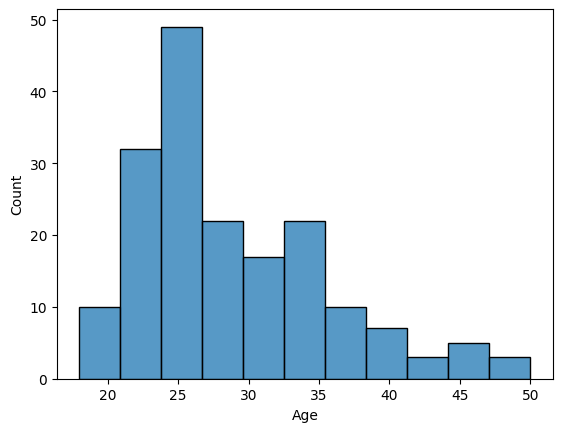

In [7]:
sns.histplot(data=df,x=df['Age'])

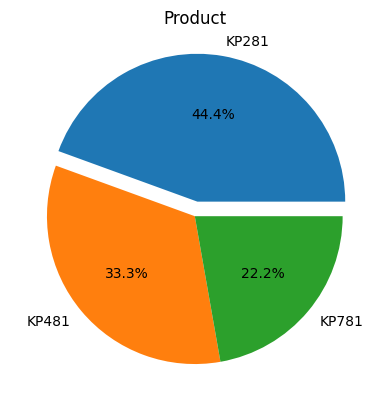

In [8]:
plt.title('Product')
plt.pie(df['Product'].value_counts(),autopct='%1.1f%%',labels=df['Product'].value_counts().index,explode=(0.1,0,0))
plt.show()

The sales percentage of KP281, KP481 and KP781 are 44.4%, 33.3% and 22.2% respectively.

Categorization of customer characteristics:

            Age: less than 35 years(<35)/35 years and above(≥35)
            
            Fitness: 4 and 5(fit)/less than 4(unfit)
            
            Income: less than 50k(<50k)/50k and above(≥50k)
            
            Miles: less than 100 miles(<100)/100 miles and above(≥100)

In [9]:
df['Age_cat']=pd.cut(df['Age'],bins=2,labels=['<35','≥35'])
df['fitness_cat']=pd.cut(df['Fitness'],bins=2,labels=['notfit','fit'])
df['income_cat']=pd.cut(df['Income'],bins=[min(df['Income']),50000,max(df['Income'])+1],right=False,labels=['<50k','≥50k'])
df['miles_cat']=pd.cut(df['Miles'],bins=[min(df['Miles']),100,max(df['Miles'])+1],right=False,labels=['<100','≥100'])
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_cat,fitness_cat,income_cat,miles_cat
0,KP281,18,Male,14,Single,3,4,29562,112,<35,fit,<50k,≥100
1,KP281,19,Male,15,Single,2,3,31836,75,<35,notfit,<50k,<100
2,KP281,19,Female,14,Partnered,4,3,30699,66,<35,notfit,<50k,<100
3,KP281,19,Male,12,Single,3,3,32973,85,<35,notfit,<50k,<100
4,KP281,20,Male,13,Partnered,4,2,35247,47,<35,notfit,<50k,<100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,≥35,fit,≥50k,≥100
176,KP781,42,Male,18,Single,5,4,89641,200,≥35,fit,≥50k,≥100
177,KP781,45,Male,16,Single,5,5,90886,160,≥35,fit,≥50k,≥100
178,KP781,47,Male,18,Partnered,4,5,104581,120,≥35,fit,≥50k,≥100


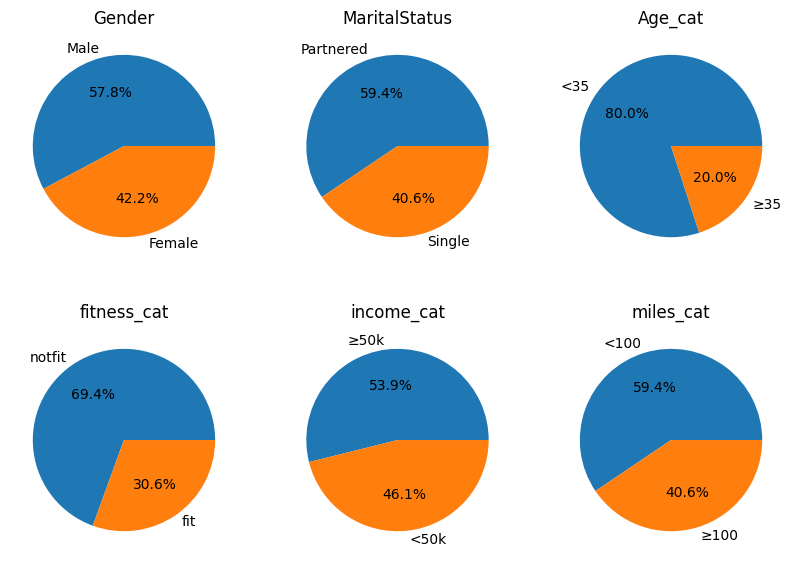

In [10]:
l=['Gender','MaritalStatus','Age_cat','fitness_cat','income_cat','miles_cat']
x=1
plt.figure(figsize=(10,7))
for i in l:
    plt.subplot(2,3,x)
    plt.title(i)
    plt.pie(df[i].value_counts(),autopct='%1.1f%%',labels=df[i].value_counts().index)
    x=x+1
plt.show()

In [11]:
p_product=df['Product'].value_counts()/df.shape[0]
p_product

Product
KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: count, dtype: float64

The probability of customers buying KP281, KP481 and KP781 is 0.44, 0.33 and 0.22 respectively.

In [12]:
p_male,p_female=df['Gender'].value_counts()/df.shape[0]
print('probability of male:',p_male)
print('probability of female:',p_female)

probability of male: 0.5777777777777777
probability of female: 0.4222222222222222


The probability of buying Treadmill is 0.58 and 0.42 by male and female respectively.

In [13]:
gen=pd.crosstab(df['Product'],df['Gender'])
gen

Gender,Female,Male
Product,,
KP281,40,40
KP481,29,31
KP781,7,33


In [14]:
gen=pd.merge(gen,p_product,how='inner',on='Product').rename(columns={'count':'p(product)'})
gen

,Female,Male,p(product)
Product,,,
KP281,40,40,0.444444
KP481,29,31,0.333333
KP781,7,33,0.222222


In [15]:
gen['p(P∩F)']=gen['Female']/df.shape[0]
gen['p(P∩M)']=gen['Male']/df.shape[0]
gen

,Female,Male,p(product),p(P∩F),p(P∩M)
Product,,,,,
KP281,40,40,0.444444,0.222222,0.222222
KP481,29,31,0.333333,0.161111,0.172222
KP781,7,33,0.222222,0.038889,0.183333


The probabilities of buying KP281, KP481 and KP781 and customer to be female are 0.22, 0.16 and 0.04 respectively. Similarly the probabilities of buying KP281, KP481 and KP781 and customer to be male are 0.22, 0.17 and 0.18.

In [16]:
gen['p(P/F)']=gen['p(P∩F)']/p_female
gen['p(P/M)']=gen['p(P∩M)']/p_male
gen

,Female,Male,p(product),p(P∩F),p(P∩M),p(P/F),p(P/M)
Product,,,,,,,
KP281,40,40,0.444444,0.222222,0.222222,0.526316,0.384615
KP481,29,31,0.333333,0.161111,0.172222,0.381579,0.298077
KP781,7,33,0.222222,0.038889,0.183333,0.092105,0.317308


Among Female customers probabilities of buying KP281, KP481 and KP781 are 0.53, 0.38 and 0.09 respectively. 

Among male customers probabilities of buying KP281, KP481 and KP781 are 0.38, 0.30 and 0.32 respectively.

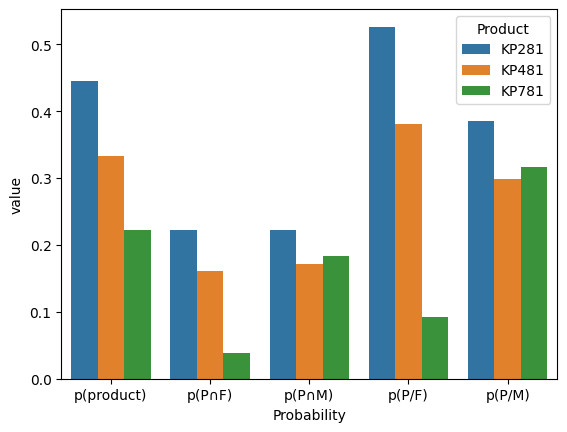

In [17]:
melt_gen=pd.melt(gen.reset_index(),id_vars=['Product','Female','Male'])
sns.barplot(data=melt_gen,hue=melt_gen['Product'],y=melt_gen['value'],x=melt_gen['variable'])
plt.xlabel('Probability')
plt.show()

In [18]:
df['Age_cat'].value_counts()/df.shape[0]

Age_cat
<35    0.8
≥35    0.2
Name: count, dtype: float64

In [19]:
p_below,p_above=df['Age_cat'].value_counts()/df.shape[0]
print('probability of below 35 age:',p_below)
print('probability of 35 and above age:',p_above)

probability of below 35 age: 0.8
probability of 35 and above age: 0.2


In [20]:
age=pd.crosstab(df['Product'],df['Age_cat'])
age=pd.merge(age,p_product,how='inner',on='Product').rename(columns={'count':'p(product)'})
age

,<35,≥35,p(product)
Product,,,
KP281,63,17,0.444444
KP481,48,12,0.333333
KP781,33,7,0.222222


In [21]:
age['p(P∩<35)']=age['<35']/df.shape[0]
age['p(P∩≥35)']=age['≥35']/df.shape[0]
age

,<35,≥35,p(product),p(P∩<35),p(P∩≥35)
Product,,,,,
KP281,63,17,0.444444,0.350000,0.094444
KP481,48,12,0.333333,0.266667,0.066667
KP781,33,7,0.222222,0.183333,0.038889


The probabilities of buying KP281, KP481 and KP781 and customer age to be less than 35 are 0.35, 0.27 and 0.18 respectively. Similarly the probabilities of buying KP281, KP481 and KP781 and customer age to be 35 and more are 0.09, 0.07 and 0.04.

In [22]:
age['p(P/<35)']=age['p(P∩<35)']/p_below
age['p(P/≥35)']=age['p(P∩≥35)']/p_above
age

,<35,≥35,p(product),p(P∩<35),p(P∩≥35),p(P/<35),p(P/≥35)
Product,,,,,,,
KP281,63,17,0.444444,0.350000,0.094444,0.437500,0.472222
KP481,48,12,0.333333,0.266667,0.066667,0.333333,0.333333
KP781,33,7,0.222222,0.183333,0.038889,0.229167,0.194444


Among customers of age less than 35 years, probabilities of buying KP281, KP481 and KP781 are 0.44, 0.33 and 0.23 respectively. 

Among customers of age 35 years and above, probabilities of buying KP281, KP481 and KP781 are 0.48, 0.33 and 0.19 respectively.

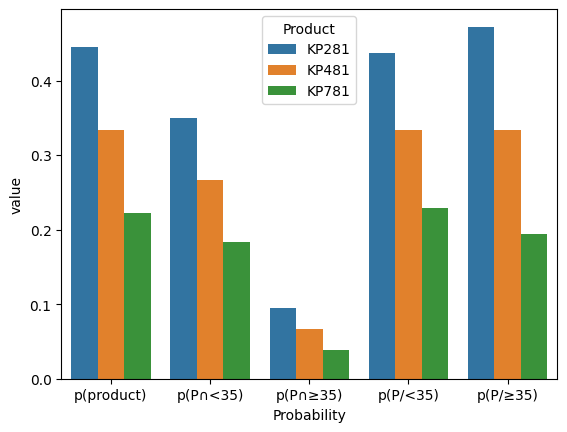

In [23]:
melt_age=pd.melt(age.reset_index(),id_vars=['Product','<35','≥35'])
sns.barplot(data=melt_age,hue=melt_age['Product'],y=melt_age['value'],x=melt_age['variable'])
plt.xlabel('Probability')
plt.show()

In [24]:
df['MaritalStatus'].value_counts()/df.shape[0]

MaritalStatus
Partnered    0.594444
Single       0.405556
Name: count, dtype: float64

In [25]:
p_partnered,p_single=df['MaritalStatus'].value_counts()/df.shape[0]
print('probability of partnered:',p_partnered)
print('probability of single:',p_single)

probability of partnered: 0.5944444444444444
probability of single: 0.40555555555555556


In [26]:
ms=pd.crosstab(df['Product'],df['MaritalStatus'])
ms=pd.merge(ms,p_product,how='inner',on='Product').rename(columns={'count':'p(product)'})
ms

,Partnered,Single,p(product)
Product,,,
KP281,48,32,0.444444
KP481,36,24,0.333333
KP781,23,17,0.222222


In [27]:
ms['p(P∩married)']=ms['Partnered']/df.shape[0]
ms['p(P∩single)']=ms['Single']/df.shape[0]
ms

,Partnered,Single,p(product),p(P∩married),p(P∩single)
Product,,,,,
KP281,48,32,0.444444,0.266667,0.177778
KP481,36,24,0.333333,0.200000,0.133333
KP781,23,17,0.222222,0.127778,0.094444


The probabilities of buying KP281, KP481 and KP781 and customer is to be married are 0.27, 0.20 and 0.13 respectively. Similarly the probabilities of buying KP281, KP481 and KP781 and customer is to be single are 0.18, 0.13 and 0.94.

In [28]:
ms['p(P/married)']=ms['p(P∩married)']/p_partnered
ms['p(P/single)']=ms['p(P∩single)']/p_single
ms

,Partnered,Single,p(product),p(P∩married),p(P∩single),p(P/married),p(P/single)
Product,,,,,,,
KP281,48,32,0.444444,0.266667,0.177778,0.448598,0.438356
KP481,36,24,0.333333,0.200000,0.133333,0.336449,0.328767
KP781,23,17,0.222222,0.127778,0.094444,0.214953,0.232877


Among married customers probabilities of buying KP281, KP481 and KP781 are 0.45, 0.34 and 0.21 respectively. 

Among unmarried customers probabilities of buying KP281, KP481 and KP781 are 0.44, 0.33 and 0.23 respectively.

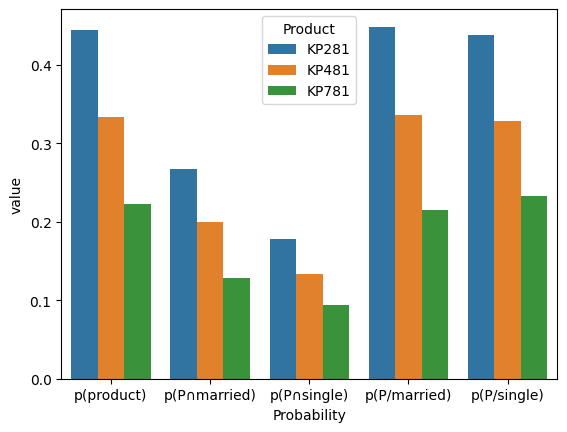

In [29]:
melt_ms=pd.melt(ms.reset_index(),id_vars=['Product','Partnered','Single'])
sns.barplot(data=melt_ms,hue=melt_ms['Product'],y=melt_ms['value'],x=melt_ms['variable'])
plt.xlabel('Probability')
plt.show()

In [30]:
df['fitness_cat'].value_counts()/df.shape[0]

fitness_cat
notfit    0.694444
fit       0.305556
Name: count, dtype: float64

In [31]:
p_notfit,p_fit=df['fitness_cat'].value_counts()/df.shape[0]
print('probability of notfit:',p_notfit)
print('probability of fit:',p_fit)

probability of notfit: 0.6944444444444444
probability of fit: 0.3055555555555556


In [32]:
fit=pd.crosstab(df['Product'],df['fitness_cat'])
fit=pd.merge(fit,p_product,how='inner',on='Product').rename(columns={'count':'p(product)'})
fit

,notfit,fit,p(product)
Product,,,
KP281,69,11,0.444444
KP481,52,8,0.333333
KP781,4,36,0.222222


In [33]:
fit['p(P∩notfit)']=fit['notfit']/df.shape[0]
fit['p(P∩fit)']=fit['fit']/df.shape[0]
fit

,notfit,fit,p(product),p(P∩notfit),p(P∩fit)
Product,,,,,
KP281,69,11,0.444444,0.383333,0.061111
KP481,52,8,0.333333,0.288889,0.044444
KP781,4,36,0.222222,0.022222,0.200000


The probabilities of buying KP281, KP481 and KP781 and customer fitness is 4 and 5 are 0.38, 0.29 and 0.02 respectively. Similarly the probabilities of buying KP281, KP481 and KP781 and customer fitness is less than 4 are 0.06, 0.04 and 0.20.

In [34]:
fit['p(P/notfit)']=fit['p(P∩notfit)']/p_notfit
fit['p(P/fit)']=fit['p(P∩fit)']/p_fit
fit

,notfit,fit,p(product),p(P∩notfit),p(P∩fit),p(P/notfit),p(P/fit)
Product,,,,,,,
KP281,69,11,0.444444,0.383333,0.061111,0.552,0.200000
KP481,52,8,0.333333,0.288889,0.044444,0.416,0.145455
KP781,4,36,0.222222,0.022222,0.200000,0.032,0.654545


Among fit customers, probabilities of buying KP281, KP481 and KP781 are 0.55, 0.42 and 0.03 respectively. 

Among unfit customers, probabilities of buying KP281, KP481 and KP781 are 0.20, 0.15 and 0.65 respectively.

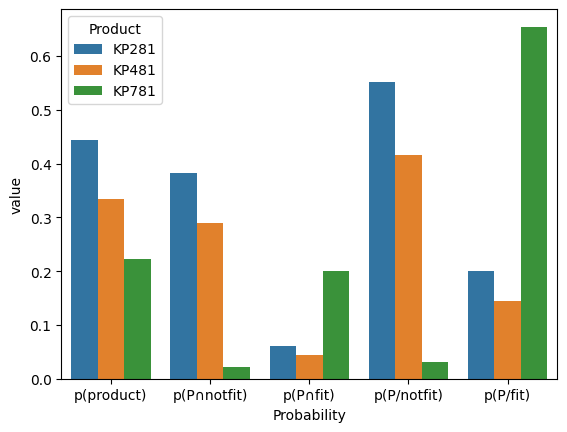

In [35]:
melt_fit=pd.melt(fit.reset_index(),id_vars=['Product','notfit','fit'])
sns.barplot(data=melt_fit,hue=melt_fit['Product'],y=melt_fit['value'],x=melt_fit['variable'])
plt.xlabel('Probability')
plt.show()

Customers who has fitness score of 4 and 5 are generating high revenue as majority of them are opting high end product(KP781).

In [36]:
df['income_cat'].value_counts()/df.shape[0]

income_cat
≥50k    0.538889
<50k    0.461111
Name: count, dtype: float64

In [37]:
p_high,p_low=df['income_cat'].value_counts()/df.shape[0]
print('probability of customer income less than 50k:',p_low)
print('probability of customer income 50k and high:',p_high)

probability of customer income less than 50k: 0.46111111111111114
probability of customer income 50k and high: 0.5388888888888889


In [38]:
income=pd.crosstab(df['Product'],df['income_cat'])
income=pd.merge(income,p_product,how='inner',on='Product').rename(columns={'count':'p(product)'})
income

,<50k,≥50k,p(product)
Product,,,
KP281,48,32,0.444444
KP481,30,30,0.333333
KP781,5,35,0.222222


In [39]:
income['p(P∩<50k)']=income['<50k']/df.shape[0]
income['p(P∩≥50k)']=income['≥50k']/df.shape[0]
income

,<50k,≥50k,p(product),p(P∩<50k),p(P∩≥50k)
Product,,,,,
KP281,48,32,0.444444,0.266667,0.177778
KP481,30,30,0.333333,0.166667,0.166667
KP781,5,35,0.222222,0.027778,0.194444


The probabilities of buying KP281, KP481 and KP781 and customer income is less than 50k are 0.27, 0.17 and 0.28 respectively. Similarly the probabilities of buying KP281, KP481 and KP781 and customer income is 50k and more are 0.18, 0.17 and 0.19.

In [40]:
income['p(P/<50k)']=income['p(P∩<50k)']/p_low
income['p(P/≥50k)']=income['p(P∩≥50k)']/p_high
income

,<50k,≥50k,p(product),p(P∩<50k),p(P∩≥50k),p(P/<50k),p(P/≥50k)
Product,,,,,,,
KP281,48,32,0.444444,0.266667,0.177778,0.578313,0.329897
KP481,30,30,0.333333,0.166667,0.166667,0.361446,0.309278
KP781,5,35,0.222222,0.027778,0.194444,0.060241,0.360825


Among customers of income more than 50k, probabilities of buying KP281, KP481 and KP781 are 0.58, 0.36 and 0.06 respectively. 

Among customers of income 50k and more, probabilities of buying KP281, KP481 and KP781 are 0.33, 0.31 and 0.36 respectively.

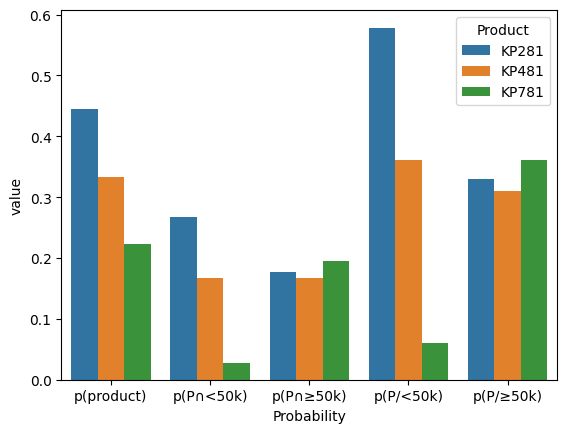

In [41]:
melt_income=pd.melt(income.reset_index(),id_vars=['Product','<50k','≥50k'])
sns.barplot(data=melt_income,hue=melt_income['Product'],y=melt_income['value'],x=melt_income['variable'])
plt.xlabel('Probability')
plt.show()

High revenue is generated from customers belonging to high income group as they are buying KP781 a little higher than the other two products. 

In [42]:
df['miles_cat'].value_counts()

miles_cat
<100    107
≥100     73
Name: count, dtype: int64

In [43]:
p_lm,p_hm=df['miles_cat'].value_counts()/df.shape[0]
print('less than 100miles:',p_lm)
print('100 and more miles:',p_hm)

less than 100miles: 0.5944444444444444
100 and more miles: 0.40555555555555556


In [44]:
miles=pd.crosstab(df['Product'],df['miles_cat'])
miles=pd.merge(miles,p_product,how='inner',on='Product').rename(columns={'count':'p(product)'})
miles

,<100,≥100,p(product)
Product,,,
KP281,62,18,0.444444
KP481,44,16,0.333333
KP781,1,39,0.222222


In [45]:
miles['p(P∩<100)']=miles['<100']/df.shape[0]
miles['p(P∩≥100)']=miles['≥100']/df.shape[0]
miles

,<100,≥100,p(product),p(P∩<100),p(P∩≥100)
Product,,,,,
KP281,62,18,0.444444,0.344444,0.100000
KP481,44,16,0.333333,0.244444,0.088889
KP781,1,39,0.222222,0.005556,0.216667


The probabilities of buying KP281, KP481 and KP781 and customers who run less than 100 miles per week are 0.34, 0.24 and 0.005 respectively. Similarly the probabilities of buying KP281, KP481 and KP781 and customers who run 100 miles and more per week are 0.10, 0.09 and 0.22.

In [46]:
miles['p(P/<100)']=miles['p(P∩<100)']/p_lm
miles['p(P/≥100)']=miles['p(P∩≥100)']/p_hm
miles

,<100,≥100,p(product),p(P∩<100),p(P∩≥100),p(P/<100),p(P/≥100)
Product,,,,,,,
KP281,62,18,0.444444,0.344444,0.100000,0.579439,0.246575
KP481,44,16,0.333333,0.244444,0.088889,0.411215,0.219178
KP781,1,39,0.222222,0.005556,0.216667,0.009346,0.534247


Among customer who run less than 100 miles per week, probabilities of buying KP281, KP481 and KP781 are 0.58, 0.41 and 0.009 respectively. 

Among customer who run 100 miles and above per week, probabilities of buying KP281, KP481 and KP781 are 0.25, 0.22 and 0.53 respectively.

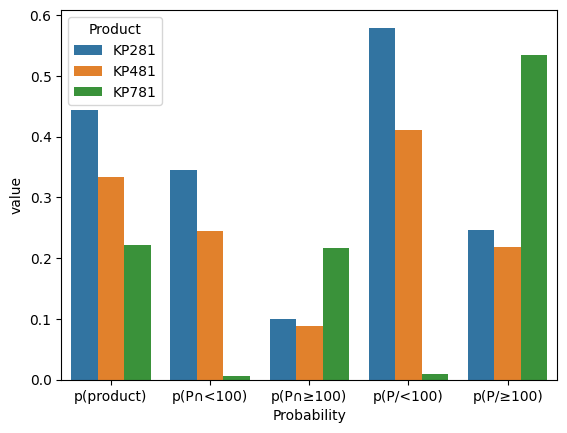

In [47]:
melt_miles=pd.melt(miles.reset_index(),id_vars=['Product','<100','≥100'])
sns.barplot(data=melt_miles,hue=melt_miles['Product'],y=melt_miles['value'],x=melt_miles['variable'])
plt.xlabel('Probability')
plt.show()

people running more miles per week are buying KP781 much higher than other two products. 

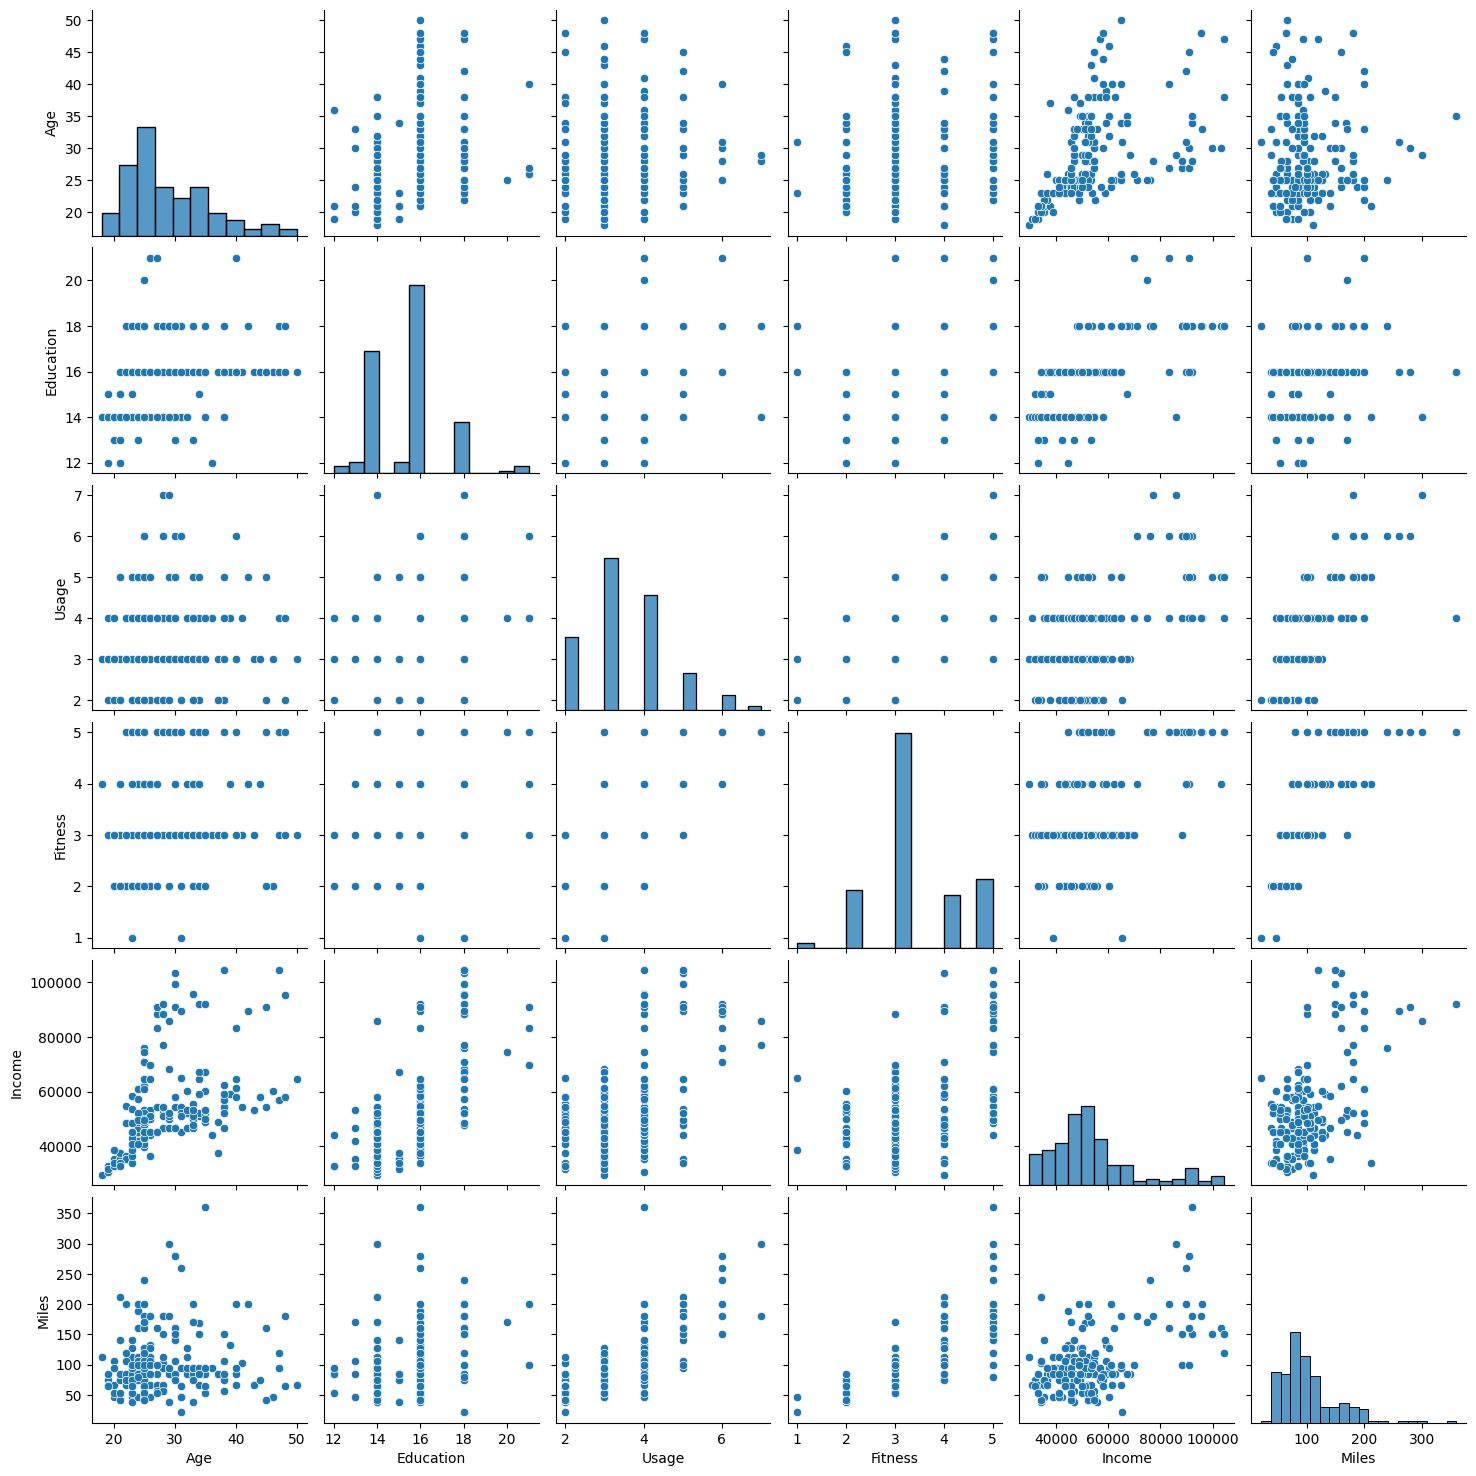

In [48]:
sns.pairplot(df)
plt.show()

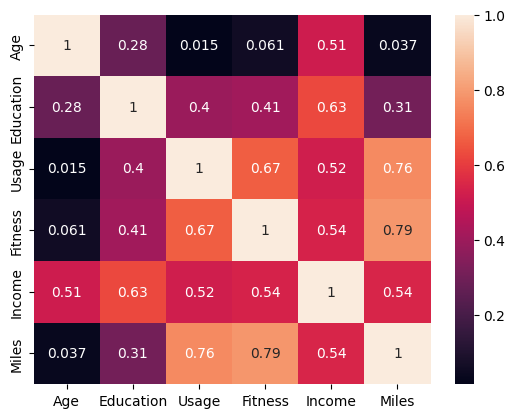

In [49]:
sns.heatmap(df[['Age','Education','Usage','Fitness','Income','Miles']].corr(),annot=True)
plt.show()

There is a strong positive correlation between fitness of the customers and miles run by them, between miles run and usage and also between fitness and usage.

Recomendations:
    
    
    1. As majority of the customers are buying KP281, more investment on this product would help in growing the business in the future
    
    
    2.As major number no of customers are the youngsters, more focus should be on treadmills designed for youngsters.
    
    
    3.As male customers are opting all the three products in almost equal proportion, using strategies to attract male customers towards high end product(KP781) would be helpfull to increase business revenue.
    
    
    4.As customers doing moderate and heavy exercise(running) are prefering KP781 than other products, try to increase that proportion even more.
    
    
    5.Similar kind of strategy used in recomendation four can be applied to fit customers and also to customers belonging to high income group.